<a href="https://colab.research.google.com/github/drpaj12/LEARNING_GNNs/blob/main/yosys_and_hw2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the yosys install

For GPU = Runtime->"Change Runtime Type"

In [1]:
!curl -O https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
!bash Miniconda3-py37_4.10.3-Linux-x86_64.sh -b -f -p miniconda-synth/
!miniconda-synth/bin/conda install --yes -c LiteX-Hub yosys
!miniconda-synth/bin/conda install --yes -c SymbiFlow verible

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 84.9M  100 84.9M    0     0  83.6M      0  0:00:01  0:00:01 --:--:-- 83.6M
PREFIX=/content/miniconda-synth
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /content/miniconda-synth

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2021.7.5=h06a4308_1
    - certifi==2021.5.30=py37h06a4308_0
    - cffi==1.14.6=py37h400218f_0
    - chardet==4.0.0=py37h06a4308_1003
    - conda-package-handling==1.7.3=py37h27cfd23_1
    - conda==4.10.3=py37h06a4308_0
    - cryptography==3.4.7=py37hd23ed53_0
    - idna==2.10=pyhd3eb1b0_0
    - ld_impl_linux-64==2.35.1=h7274673_9
    - libffi==3.3=he6710b0_2
    - libgcc-ng==9.3.0=h5101ec6_17
    - libgomp==9.3.0=h5101ec6_17
    - libstdcxx-ng==9.3.0=

Verilog to test

In [2]:
%%bash -c 'source miniconda-synth/bin/activate; cat > adder.v; verible-verilog-lint adder.v'

module adder(
  input wire a,
  input wire b,
  output wire [1:0] out
);
  assign out = a + b;
endmodule

In [3]:
!ls -l

total 86952
-rw-r--r--  1 root root      106 May 29 14:17 adder.v
-rw-r--r--  1 root root 89026327 May 29 14:16 Miniconda3-py37_4.10.3-Linux-x86_64.sh
drwxr-xr-x 16 root root     4096 May 29 14:17 miniconda-synth
drwxr-xr-x  1 root root     4096 May 23 13:39 sample_data


Yosys reads and executes with .dot visualization


In [4]:
%%script miniconda-synth/bin/yosys -Q -T

read -sv adder.v
hierarchy -top adder

proc; opt

opt_clean
show -format dot -prefix synth_design
stat


yosys> 
yosys> 

1. Executing Verilog-2005 frontend: adder.v
Parsing SystemVerilog input from `adder.v' to AST representation.
Storing AST representation for module `$abstract\adder'.
Successfully finished Verilog frontend.

yosys> 
2. Executing HIERARCHY pass (managing design hierarchy).

3. Executing AST frontend in derive mode using pre-parsed AST for module `\adder'.
Generating RTLIL representation for module `\adder'.

3.1. Analyzing design hierarchy..
Top module:  \adder

3.2. Analyzing design hierarchy..
Top module:  \adder
Removing unused module `$abstract\adder'.
Removed 1 unused modules.

yosys> 
yosys> 
4. Executing PROC pass (convert processes to netlists).

4.1. Executing PROC_CLEAN pass (remove empty switches from decision trees).
Cleaned up 0 empty switches.

4.2. Executing PROC_RMDEAD pass (remove dead branches from decision trees).
Removed a total of 0 dead cases.

4.3. Executing PROC_PRUNE pass (remove redundant assignments in processes).
Removed 0 redundant assignme

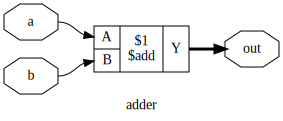

In [5]:
import graphviz
graphviz.Source.from_file('synth_design.dot')

In [6]:
%%script miniconda-synth/bin/yosys -Q -T

read -sv adder.v
hierarchy -top adder

proc; opt
techmap; opt

opt_clean
show -format dot -prefix synth_gate
stat


yosys> 
yosys> 

1. Executing Verilog-2005 frontend: adder.v
Parsing SystemVerilog input from `adder.v' to AST representation.
Storing AST representation for module `$abstract\adder'.
Successfully finished Verilog frontend.

yosys> 
2. Executing HIERARCHY pass (managing design hierarchy).

3. Executing AST frontend in derive mode using pre-parsed AST for module `\adder'.
Generating RTLIL representation for module `\adder'.

3.1. Analyzing design hierarchy..
Top module:  \adder

3.2. Analyzing design hierarchy..
Top module:  \adder
Removing unused module `$abstract\adder'.
Removed 1 unused modules.

yosys> 
yosys> 
4. Executing PROC pass (convert processes to netlists).

4.1. Executing PROC_CLEAN pass (remove empty switches from decision trees).
Cleaned up 0 empty switches.

4.2. Executing PROC_RMDEAD pass (remove dead branches from decision trees).
Removed a total of 0 dead cases.

4.3. Executing PROC_PRUNE pass (remove redundant assignments in processes).
Removed 0 redundant assignme

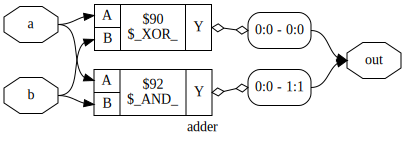

In [7]:
import graphviz
graphviz.Source.from_file('synth_gate.dot')

In [8]:
!ls -l

total 86960
-rw-r--r--  1 root root      106 May 29 14:17 adder.v
-rw-r--r--  1 root root 89026327 May 29 14:16 Miniconda3-py37_4.10.3-Linux-x86_64.sh
drwxr-xr-x 16 root root     4096 May 29 14:17 miniconda-synth
drwxr-xr-x  1 root root     4096 May 23 13:39 sample_data
-rw-r--r--  1 root root      489 May 29 14:17 synth_design.dot
-rw-r--r--  1 root root      973 May 29 14:17 synth_gate.dot


In [9]:
!curl --silent -L https://github.com/YosysHQ/yosys/archive/refs/tags/yosys-0.11.tar.gz | tar xvzf - yosys-yosys-0.11/examples/cmos --strip-components=2

yosys-yosys-0.11/examples/cmos/
yosys-yosys-0.11/examples/cmos/.gitignore
yosys-yosys-0.11/examples/cmos/README
yosys-yosys-0.11/examples/cmos/cmos_cells.lib
yosys-yosys-0.11/examples/cmos/cmos_cells.sp
yosys-yosys-0.11/examples/cmos/cmos_cells.v
yosys-yosys-0.11/examples/cmos/cmos_cells_digital.sp
yosys-yosys-0.11/examples/cmos/counter.v
yosys-yosys-0.11/examples/cmos/counter.ys
yosys-yosys-0.11/examples/cmos/counter_digital.ys
yosys-yosys-0.11/examples/cmos/counter_tb.gtkw
yosys-yosys-0.11/examples/cmos/counter_tb.v
yosys-yosys-0.11/examples/cmos/testbench.sh
yosys-yosys-0.11/examples/cmos/testbench.sp
yosys-yosys-0.11/examples/cmos/testbench_digital.sh
yosys-yosys-0.11/examples/cmos/testbench_digital.sp


In [10]:
%%script miniconda-synth/bin/yosys -Q -T

read -sv adder.v
hierarchy -top adder

read -sv -lib cmos/cmos_cells.v
synth
dfflibmap -liberty cmos/cmos_cells.lib
abc -liberty cmos/cmos_cells.lib

opt_clean
show -format dot -prefix synth_cmos
stat -liberty cmos/cmos_cells.lib


yosys> 
yosys> 

1. Executing Verilog-2005 frontend: adder.v
Parsing SystemVerilog input from `adder.v' to AST representation.
Storing AST representation for module `$abstract\adder'.
Successfully finished Verilog frontend.

yosys> 
2. Executing HIERARCHY pass (managing design hierarchy).

3. Executing AST frontend in derive mode using pre-parsed AST for module `\adder'.
Generating RTLIL representation for module `\adder'.

3.1. Analyzing design hierarchy..
Top module:  \adder

3.2. Analyzing design hierarchy..
Top module:  \adder
Removing unused module `$abstract\adder'.
Removed 1 unused modules.

yosys> 
yosys> 
4. Executing Verilog-2005 frontend: cmos/cmos_cells.v
Parsing SystemVerilog input from `cmos/cmos_cells.v' to AST representation.
Storing AST representation for module `$abstract\BUF'.
Storing AST representation for module `$abstract\NOT'.
Storing AST representation for module `$abstract\NAND'.
Storing AST representation for module `$abstract\NOR'.
Storing AST representation

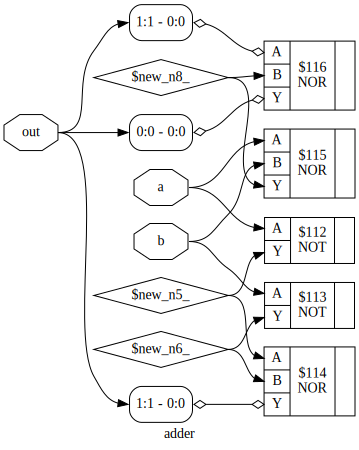

In [11]:
import graphviz
graphviz.Source.from_file('synth_cmos.dot')

In [12]:
!cat ./synth_cmos.dot

digraph "adder" {
label="adder";
rankdir="LR";
remincross=true;
n4 [ shape=octagon, label="a", color="black", fontcolor="black" ];
n5 [ shape=octagon, label="b", color="black", fontcolor="black" ];
n6 [ shape=octagon, label="out", color="black", fontcolor="black" ];
c9 [ shape=record, label="{{<p7> A|<p8> Y}|$112\nNOT|{}}" ];
c10 [ shape=record, label="{{<p7> A|<p8> Y}|$113\nNOT|{}}" ];
c12 [ shape=record, label="{{<p7> A|<p11> B|<p8> Y}|$114\nNOR|{}}" ];
x0 [ shape=record, style=rounded, label="<s0> 1:1 - 0:0 " ];
x0:e -> c12:p8:w [arrowhead=odiamond, arrowtail=odiamond, dir=both, color="black", label=""];
c13 [ shape=record, label="{{<p7> A|<p11> B|<p8> Y}|$115\nNOR|{}}" ];
c14 [ shape=record, label="{{<p7> A|<p11> B|<p8> Y}|$116\nNOR|{}}" ];
x1 [ shape=record, style=rounded, label="<s0> 1:1 - 0:0 " ];
x1:e -> c14:p7:w [arrowhead=odiamond, arrowtail=odiamond, dir=both, color="black", label=""];
x2 [ shape=record, style=rounded, label="<s0> 0:0 - 0:0 " ];
x2:e -> c14:p8:w [arrowhead=o

In [13]:
!ls -l
!apt-get update && apt-get install -y graphviz libgraphviz-dev
!pip install pygraphviz

total 86968
-rw-r--r--  1 root root      106 May 29 14:17 adder.v
drwxrwxr-x  2 root root     4096 Nov  5  2021 cmos
-rw-r--r--  1 root root 89026327 May 29 14:16 Miniconda3-py37_4.10.3-Linux-x86_64.sh
drwxr-xr-x 16 root root     4096 May 29 14:17 miniconda-synth
drwxr-xr-x  1 root root     4096 May 23 13:39 sample_data
-rw-r--r--  1 root root     1757 May 29 14:17 synth_cmos.dot
-rw-r--r--  1 root root      489 May 29 14:17 synth_design.dot
-rw-r--r--  1 root root      973 May 29 14:17 synth_gate.dot
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,702 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,731 kB]


Reading in .dot file from the yosys output ... okay

> graph:
MultiDiGraph named 'adder' with 14 nodes and 16 edges
> nodes:
['n4', 'n5', 'n6', 'c9', 'c10', 'c12', 'x0', 'c13', 'c14', 'x1', 'x2', 'n1', 'n2', 'n3']
> edges:
[('n4', 'c9'), ('n4', 'c13'), ('n5', 'c10'), ('n5', 'c13'), ('n6', 'x0'), ('n6', 'x1'), ('n6', 'x2'), ('x0', 'c12'), ('x1', 'c14'), ('x2', 'c14'), ('n1', 'c9'), ('n1', 'c12'), ('n2', 'c10'), ('n2', 'c12'), ('n3', 'c13'), ('n3', 'c14')]
> Showing graph!


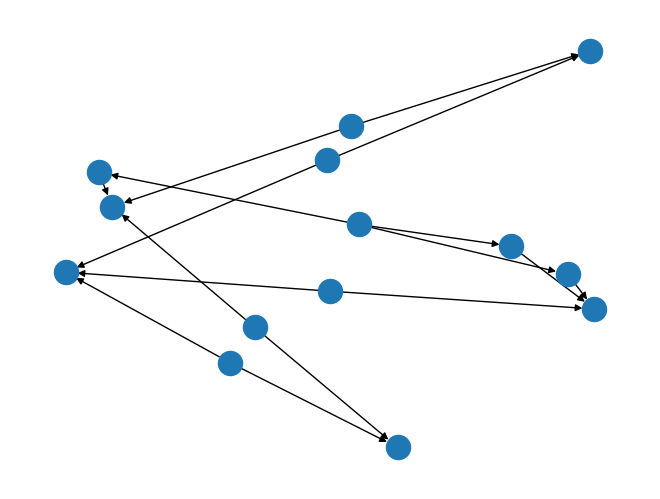

In [14]:
import networkx as nx

# Read the graph from the .dot file
graph = nx.drawing.nx_agraph.read_dot("./synth_cmos.dot")

print("> graph:")
print(graph)
print("> nodes:")
print(graph.nodes())
print("> edges:")
print(graph.edges())

print("> Showing graph!")
nx.draw(graph)



# The 'graph' variable now contains a NetworkX graph object
# You can perform operations on it, such as:
# - Accessing nodes: graph.nodes()
# - Accessing edges: graph.edges()
# - Drawing the graph: nx.draw(graph)

> Fancier graph!


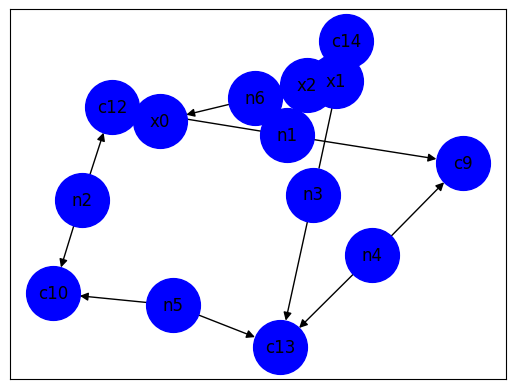

In [15]:

print("> Fancier graph!")
options = {
    'node_color': 'blue',
    'node_size': 100,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 12,
    'node_size':1500
}
nx.draw_networkx(graph, arrows=True, **options)

Testing out pyverilog - This is what HW2VEC used

In [16]:
!sudo apt install iverilog
!pip3 install jinja2 ply
!pip3 install pytest pytest-pythonpath


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  gtkwave
The following NEW packages will be installed:
  iverilog
0 upgraded, 1 newly installed, 0 to remove and 67 not upgraded.
Need to get 2,130 kB of archives.
After this operation, 6,749 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 iverilog amd64 11.0-1.1 [2,130 kB]
Fetched 2,130 kB in 3s (789 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package iverilog.
(Reading database ..

In [17]:
# install pyverilog
#!python3 setup.py install
!pip install 'git+https://github.com/PyHDI/Pyverilog.git'

  Cloning https://github.com/PyHDI/Pyverilog.git to /tmp/pip-req-build-tyb67gwj
  Running command git clone --filter=blob:none --quiet https://github.com/PyHDI/Pyverilog.git /tmp/pip-req-build-tyb67gwj
  Resolved https://github.com/PyHDI/Pyverilog.git to commit 81838bc463d17148ef6872af34eb27585ee349ba
  Preparing metadata (setup.py) ... done
  Created wheel for pyverilog: filename=pyverilog-1.3.0-py3-none-any.whl size=119162 sha256=94d951251b96e1231919fa2eebdc2d7e1d0103de5a54a838869fa0fc5b16f0db
  Stored in directory: /tmp/pip-ephem-wheel-cache-mbq8nglp/wheels/71/b1/ee/c9d5287e5eebd4469d62f4157a5b5c36e470a595aebefdda42
Successfully built pyverilog


In [18]:
!ls -l ./
#!ls -l /usr/bin/
#!ls -l /usr/local/lib/
#!ls -l /usr/local/lib/python3.11/dist-packages/
#!ls -l /usr/local/lib/python3.11/dist-packages/pyverilog/
#!ls -l /usr/local/bin/

#!ls -l /Library/
#!ls -l /Library/

!which parser.py


total 86968
-rw-r--r--  1 root root      106 May 29 14:17 adder.v
drwxrwxr-x  2 root root     4096 Nov  5  2021 cmos
-rw-r--r--  1 root root 89026327 May 29 14:16 Miniconda3-py37_4.10.3-Linux-x86_64.sh
drwxr-xr-x 16 root root     4096 May 29 14:17 miniconda-synth
drwxr-xr-x  1 root root     4096 May 23 13:39 sample_data
-rw-r--r--  1 root root     1757 May 29 14:17 synth_cmos.dot
-rw-r--r--  1 root root      489 May 29 14:17 synth_design.dot
-rw-r--r--  1 root root      973 May 29 14:17 synth_gate.dot


In [19]:
from __future__ import absolute_import
from __future__ import print_function
import sys
import os
from optparse import OptionParser

# the next line can be removed after installation
#sys.path.insert(0, os.path.dirname(os.path.dirname(os.path.abspath(__file__))))

import pyverilog
from pyverilog.vparser.parser import parse


def main():
    INFO = "Verilog code parser"
    VERSION = pyverilog.__version__
    USAGE = "Usage: python example_parser.py file ..."

    #def showVersion():
    #    print(INFO)
    #    print(VERSION)
    #    print(USAGE)
    #    sys.exit()

    #optparser = OptionParser()
    #optparser.add_option("-v", "--version", action="store_true", dest="showversion",
    #                     default=False, help="Show the version")
    #optparser.add_option("-I", "--include", dest="include", action="append",
    #                     default=[], help="Include path")
    #optparser.add_option("-D", dest="define", action="append",
    #                     default=[], help="Macro Definition")
    #(options, args) = optparser.parse_args()

    #filelist = args
    filelist = ["adder.v"]

    #if options.showversion:
    #    showVersion()
    print("here")
    for f in filelist:
        if not os.path.exists(f):
            raise IOError("file not found: " + f)

    #if len(filelist) == 0:
    #    showVersion()

    ast, directives = parse(filelist)

    ast.show()
    for lineno, directive in directives:
        print('Line %d : %s' % (lineno, directive))


if __name__ == '__main__':
    main()

here


Generating LALR tables


Source:  (at 2)
  Description:  (at 2)
    ModuleDef: adder (from 2 to 8)
      Paramlist:  (at 0)
      Portlist:  (at 2)
        Ioport:  (at 3)
          Input: a, False (at 3)
          Wire: a, False (at 3)
        Ioport:  (at 4)
          Input: b, False (at 4)
          Wire: b, False (at 4)
        Ioport:  (at 5)
          Output: out, False (at 5)
            Width:  (at 5)
              IntConst: 1 (at 5)
              IntConst: 0 (at 5)
          Wire: out, False (at 5)
            Width:  (at 5)
              IntConst: 1 (at 5)
              IntConst: 0 (at 5)
      Assign:  (from 7 to 7)
        Lvalue:  (at 7)
          Identifier: out (at 7)
        Rvalue:  (at 7)
          Plus:  (at 7)
            Identifier: a (at 7)
            Identifier: b (at 7)


Download the github of hw2vec
CHANGED to use the zip file of hw2vec with modifications

In [20]:
# Original version, but there are folder directories and some errors that I fixed
#!git clone https://github.com/AICPS/hw2vec.git
#!unzip /content/hw2vec/assets/datasets.zip -d /content/hw2vec/assets/

In [35]:
from google.colab import drive
drive.mount('/content/drive')

!ls -l /content/drive/MyDrive/Colab\ Notebooks/

# unzip the hw2vec I've updated to work in Colab
!unzip -o /content/drive/MyDrive/Colab\ Notebooks/hw2vec.zip -d /content/
!unzip -o /content/drive/MyDrive/Colab\ Notebooks/hw2vec_deb.zip -d /content/
#!mv /content/hw2vec_deb /content/hw2vec/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
total 6675
-rw------- 1 root root   55932 Jul 30  2024 background_remover.ipynb
-rw------- 1 root root    2773 May 21 21:06 GNN_sources_and_notes.ipynb
-rw------- 1 root root   33968 May 21 20:52 GNN_tutorial.ipynb
-rw------- 1 root root   92108 May 22 19:02 hw2vec2.ipynb
-rw------- 1 root root 3211886 May 29 14:43 hw2vec_deb.zip
-rw------- 1 root root   39098 May 22 18:39 hw2vec.ipynb
-rw------- 1 root root 3126990 May 27 17:53 hw2vec.zip
-rw------- 1 root root   21245 May 22 18:11 norm_and_mes_work.ipynb
-rw------- 1 root root   27182 May 22 19:36 Untitled0.ipynb
-rw------- 1 root root   15135 May 23 14:42 Untitled1.ipynb
-rw------- 1 root root  204942 May 27 15:01 yosys.ipynb
Archive:  /content/drive/MyDrive/Colab Notebooks/hw2vec.zip
  inflating: /content/hw2vec/.gitignore  
  inflating: /content/hw2vec/.travis.yml  
  inflating: /content/hw2vec/assets/da

In [36]:
# For deleting to start over
!ls -l /content/drive/MyDrive/Colab\ Notebooks/

# unzip the hw2vec I've updated to work in Colab
#!rm -rf /content/hw2vec/
#!rm -rf /content/hw2vec_deb/
#!mv /content/hw2vec_deb /content/hw2vec/

total 6675
-rw------- 1 root root   55932 Jul 30  2024 background_remover.ipynb
-rw------- 1 root root    2773 May 21 21:06 GNN_sources_and_notes.ipynb
-rw------- 1 root root   33968 May 21 20:52 GNN_tutorial.ipynb
-rw------- 1 root root   92108 May 22 19:02 hw2vec2.ipynb
-rw------- 1 root root 3211886 May 29 14:43 hw2vec_deb.zip
-rw------- 1 root root   39098 May 22 18:39 hw2vec.ipynb
-rw------- 1 root root 3126990 May 27 17:53 hw2vec.zip
-rw------- 1 root root   21245 May 22 18:11 norm_and_mes_work.ipynb
-rw------- 1 root root   27182 May 22 19:36 Untitled0.ipynb
-rw------- 1 root root   15135 May 23 14:42 Untitled1.ipynb
-rw------- 1 root root  204942 May 27 15:01 yosys.ipynb


Setup pytorch geometric

In [37]:
## Standard libraries
import os
import json
import math
import numpy as np
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgb
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2.0
import seaborn as sns
sns.reset_orig()
sns.set()

## Progress bar
from tqdm.notebook import tqdm

## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
# Torchvision
import torchvision
from torchvision.datasets import CIFAR10
from torchvision import transforms
# PyTorch Lightning
try:
    import pytorch_lightning as pl
except ModuleNotFoundError: # Google Colab does not have PyTorch Lightning installed by default. Hence, we do it here if necessary
    !pip install --quiet pytorch-lightning>=1.4
    import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint

# Path to the folder where the datasets are/should be downloaded (e.g. CIFAR10)
DATASET_PATH = "../data"
# Path to the folder where the pretrained models are saved
CHECKPOINT_PATH = "../saved_models/tutorial7"

# Setting the seed
pl.seed_everything(42)

# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)

<ipython-input-37-ebf0b716a7e6>:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export
INFO:lightning_fabric.utilities.seed:Seed set to 42


cuda:0


In [38]:
# torch geometric
try:
    import torch_geometric
except ModuleNotFoundError:
    # Installing torch geometric packages with specific CUDA+PyTorch version.
    # See https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html for details
    TORCH = torch.__version__.split('+')[0]
    CUDA = 'cu' + torch.version.cuda.replace('.','')

    !pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
    !pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
    !pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
    !pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
    !pip install torch-geometric
    import torch_geometric
import torch_geometric.nn as geom_nn
import torch_geometric.data as geom_data

In [43]:
!ls -l
!ls -l /content/hw2vec/assets/TJ-RTL-toy/TjFree/det_1011/
!pwd
#%env PYTHONPATH=/content/:$PYTHONPATH
#!python /content/hw2vec/examples/use_case_1.py
#!python /content/hw2vec/examples/use_case_2.py --yaml_path ./hw2vec/examples/example_gnn4tj.yaml --raw_dataset_path ./hw2vec/assets/datasets/TJ-RTL-toy --data_pkl_path dfg_tj_rtl.pkl --graph_type DFG --device cuda
!python /content/hw2vec_deb/examples/use_case_2.py --yaml_path ./hw2vec_deb/examples/example_gnn4tj.yaml --raw_dataset_path ./hw2vec_deb/assets/datasets/TJ-RTL-toy --data_pkl_path dfg_tj_rtl.pkl --graph_type DFG --device cuda

total 87204
-rw-r--r--  1 root root     1921 May 29 14:19 '=1.4'
-rw-r--r--  1 root root      106 May 29 14:17  adder.v
drwxrwxr-x  2 root root     4096 Nov  5  2021  cmos
drwx------  6 root root     4096 May 29 14:19  drive
drwxr-xr-x  6 root root     4096 May 29 14:44  hw2vec
drwxr-xr-x  6 root root     4096 May 27 16:54  hw2vec_deb
drwxr-xr-x  2 root root     4096 May 29 14:51  hw2vec_logs
-rw-r--r--  1 root root       76 May 29 14:52  metadata.tsv
-rw-r--r--  1 root root 89026327 May 29 14:16  Miniconda3-py37_4.10.3-Linux-x86_64.sh
drwxr-xr-x 16 root root     4096 May 29 14:17  miniconda-synth
-rw-r--r--  1 root root      211 May 29 14:52  model.cfg
-rw-r--r--  1 root root   198620 May 29 14:52  model.pth
drwxr-xr-x  1 root root     4096 May 23 13:39  sample_data
-rw-r--r--  1 root root     1757 May 29 14:17  synth_cmos.dot
-rw-r--r--  1 root root      489 May 29 14:17  synth_design.dot
-rw-r--r--  1 root root      973 May 29 14:17  synth_gate.dot
-rw-r--r--  1 root root     8998 M